In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv(("./NYPD_Arrest_Data__Year_to_Date__20241023.csv"))
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [3]:
df["ARREST_PRECINCT"].unique()


array([105, 107,  48, 121, 100,  14,  84,  70,  67,  77,  32,  43,   6,
       106, 109,  42,  40,  69,  41,   5, 120,  71, 102,  73,  52, 113,
       103,  47, 112,  30,  79,  23,  44, 114,  72,  61,  20,  17,  34,
        33, 110, 108,  75,  94,   7,   9,  25,  63,  78,  26, 115,  76,
        18,  83,  13,  81,  66,   1, 122,  88,  45,  19,  60,  50, 123,
       104,  10,  90,  62,  68,  46, 101,  22,  24, 111,  49,  28],
      dtype=int64)

In [4]:
df_boro = df[df['ARREST_BORO'].isin(["B","Q","M","K","S"])]
df_boro

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [5]:
df['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].astype('object')
df_precinct=df['ARREST_PRECINCT'] 
df_precinct

0         105
1         107
2          48
3         121
4         100
         ... 
195442    109
195443     34
195444     23
195445     44
195446     46
Name: ARREST_PRECINCT, Length: 195447, dtype: object

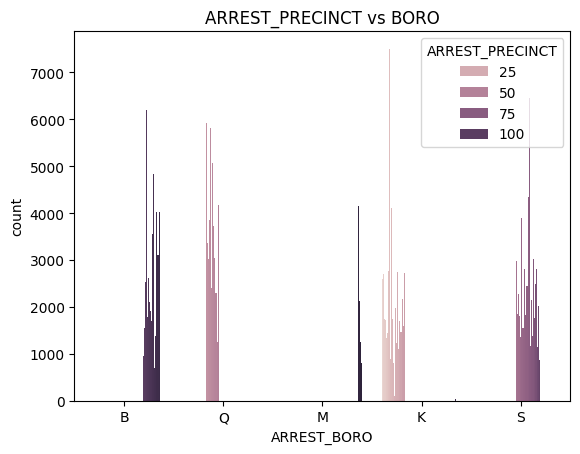

In [6]:
sns.countplot(x='ARREST_BORO', data=df_boro, hue='ARREST_PRECINCT')
plt.title('ARREST_PRECINCT vs BORO')
# assign ['Patrol', 'Transit', 'Housing'] to x-axis
plt.xticks(ticks=[0,1,2,3,4], labels=["B","Q","M","K","S"])
plt.show()

In [73]:
dfb = df[df['ARREST_BORO'] == 'B']
dfk = df[df['ARREST_BORO'] == 'K']
dfq = df[(df['ARREST_BORO'] == 'Q') &(df['ARREST_PRECINCT'] != 25)]
dfs = df[df['ARREST_BORO'] == 'S']
dfm = df[df['ARREST_BORO'] == 'M']


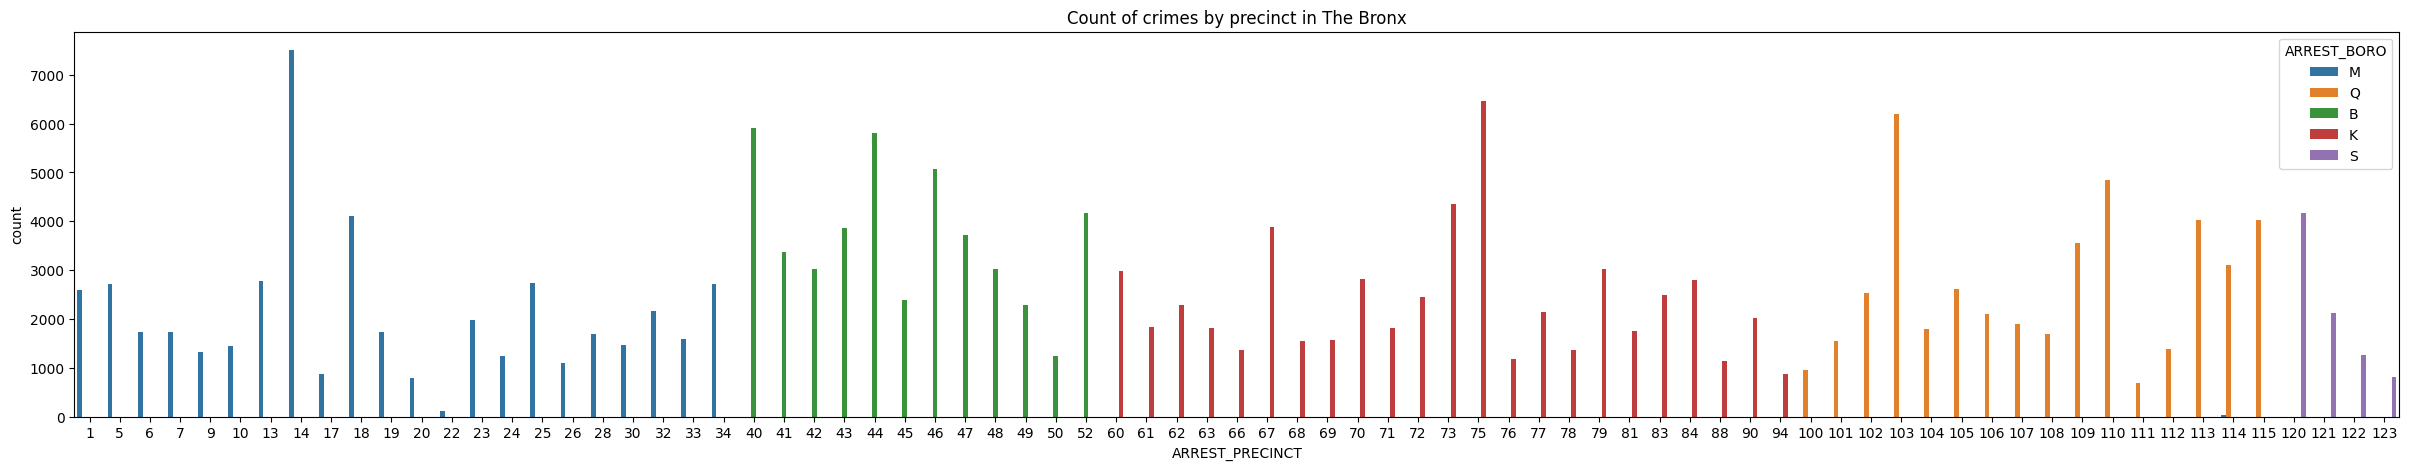

In [21]:
plt.rcParams["figure.figsize"] = (30,5)
sns.countplot(x='ARREST_PRECINCT', data=df, hue='ARREST_BORO'
)
plt.title('Count of crimes by precinct ')
plt.show()

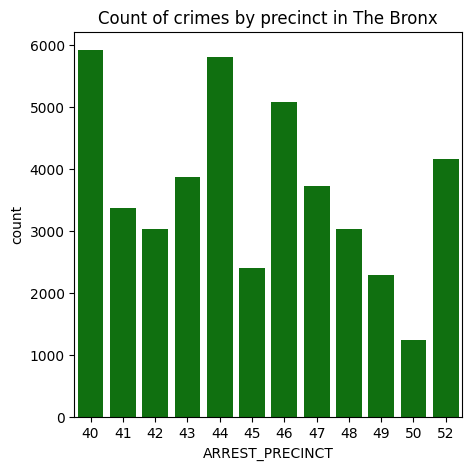

In [38]:
plt.rcParams["figure.figsize"] = (5,5)
sns.countplot(x='ARREST_PRECINCT', data=dfb,color='g'
)
plt.title('Count of crimes by precinct in The Bronx')
plt.show()

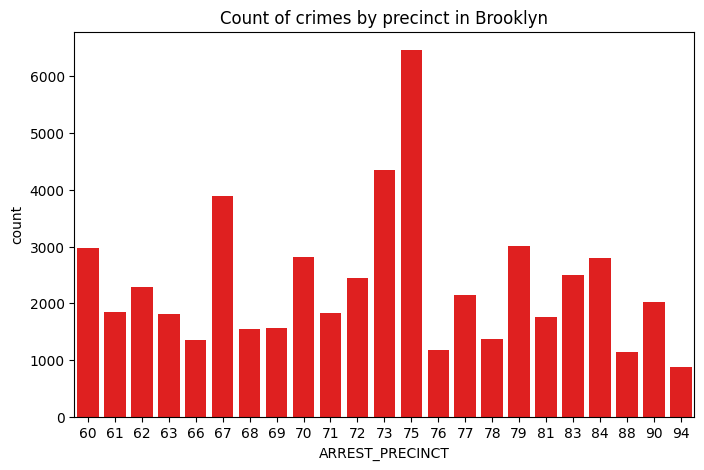

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)

sns.countplot(x='ARREST_PRECINCT', data=dfk, color='r'
)
plt.title('Count of crimes by precinct in Brooklyn')
plt.show()

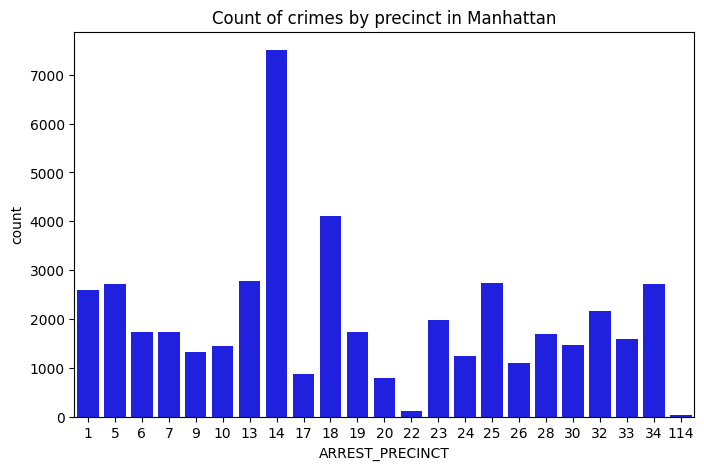

In [49]:
plt.rcParams["figure.figsize"] = (8,5)

sns.countplot(x='ARREST_PRECINCT', data=dfm, color='b'
)
plt.title('Count of crimes by precinct in Manhattan')
plt.show()

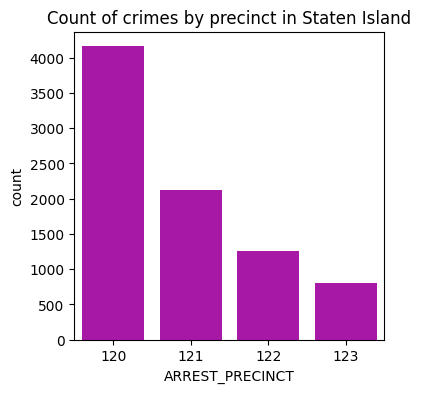

In [52]:
plt.rcParams["figure.figsize"] = (4,4)

sns.countplot(x='ARREST_PRECINCT', data=dfs, color='m'
)
plt.title('Count of crimes by precinct in Staten Island')
plt.show()

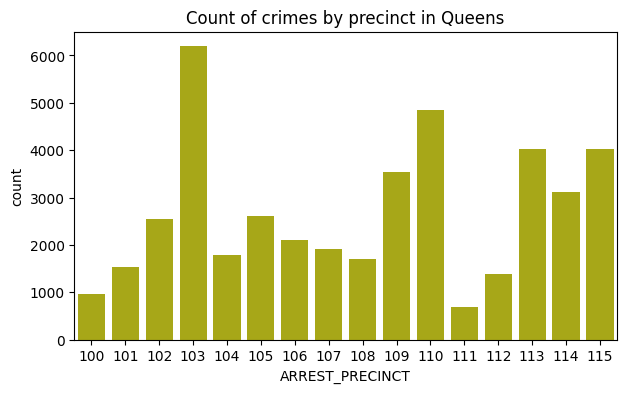

In [74]:
plt.rcParams["figure.figsize"] = (7,4)

sns.countplot(x='ARREST_PRECINCT', data=dfq, color='y'
)
plt.title('Count of crimes by precinct in Queens')
plt.show()

In [64]:
dfq['ARREST_PRECINCT']

0         105
1         107
4         100
9         100
15        106
         ... 
195415    112
195416    103
195433    106
195435    110
195442    109
Name: ARREST_PRECINCT, Length: 42978, dtype: object

In [8]:
np.count_nonzero(df[df['ARREST_BORO'].isin(['M'])]['ARREST_PRECINCT'].unique())


23

In [9]:
np.count_nonzero(df[df['ARREST_BORO'].isin(['B'])]['ARREST_PRECINCT'].unique())


12

In [10]:
np.count_nonzero(df[df['ARREST_BORO'].isin(['Q'])]['ARREST_PRECINCT'].unique())


17

In [11]:
np.count_nonzero(df[df['ARREST_BORO'].isin(['K'])]['ARREST_PRECINCT'].unique())


23

In [12]:
np.count_nonzero(df[df['ARREST_BORO'].isin(['S'])]['ARREST_PRECINCT'].unique())


4